## Libraries and variables

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

data_path = "../01_Data/"
# file_name_regr = "4-1_psp-data_feateng_all_regr.csv"
file_name_regr = "4-1_psp-data_feateng_featsel_regr.csv"

file_path_regr = data_path + file_name_regr

target_regr = "fee"

## Data load

In [63]:
df = pd.read_csv(file_path_regr, index_col=0)
df

,fee,amount_sc,3D_secured,card_Diners,card_Master,card_Visa,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,success_max
0,2.0,0.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.5,0.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.5,0.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,2.0,0.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.000000,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38217,0.5,0.783654,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
38218,5.0,0.786859,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
38219,1.0,0.786859,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
38220,0.5,0.790064,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [64]:
X = df.drop(target_regr, axis=1)
y = df[target_regr]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Baseline model

In [65]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

y_pred = reg_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.8180947153454439
R^2 Score: 0.8135040778875675


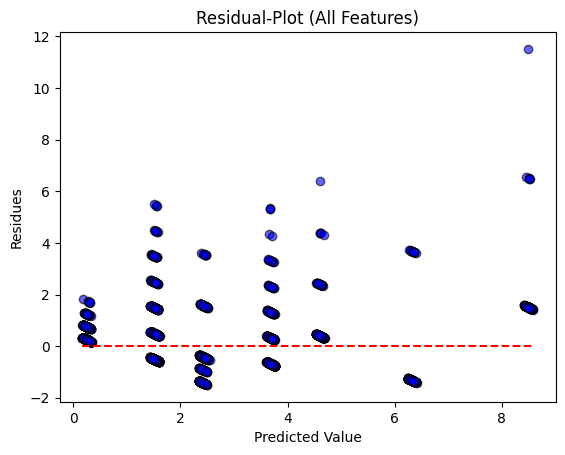

In [66]:
residuals = y_test - y_pred

# Residual plot
plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyles='dashed')
plt.xlabel('Predicted Value')
plt.ylabel('Residues')
plt.title('Residual-Plot (All Features)')
plt.show()

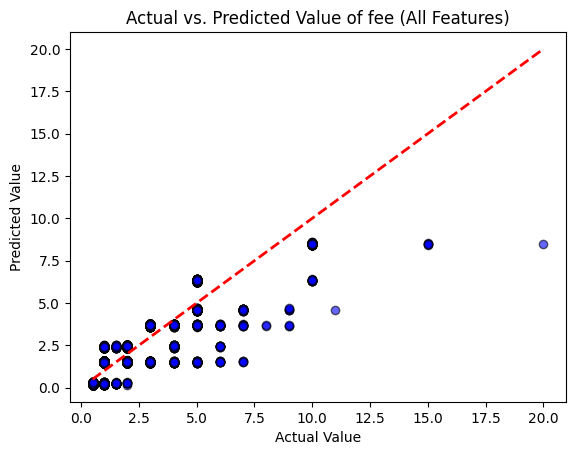

In [67]:
# Comparison plot
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Value of fee (All Features)')
plt.show()